In [16]:
import pandas as pd
from pyfolio import timeseries
import pyfolio
from copy import deepcopy

In [17]:
df_A2C = pd.read_csv('./backtest/A2Caccount.csv')

In [18]:
def get_daily_return(
    df: pd.DataFrame,
    value_col_name: str = "account_value"
) -> pd.Series:
    """获取每天的涨跌值"""
    df = deepcopy(df)
    df["daily_return"] = df[value_col_name].pct_change(1)
    df.set_index("date", inplace=True, drop=True)

    return pd.Series(df["daily_return"], index = df.index)

In [19]:
def backtest_stats(
    df: pd.DataFrame, 
    value_col_name: str = "total_assets"
) -> pd.Series:
    """对回测数据进行分析"""
    df_test = get_daily_return(df, value_col_name=value_col_name)
    perf_stats_all = timeseries.perf_stats(
        returns=df_test,
        positions=None,
        transactions=None,
        turnover_denom="AGB"
    )
    print(perf_stats_all)

    return perf_stats_all

backtest_stats(df_A2C, value_col_name='total_assets').index

Annual return          0.332378
Cumulative returns     0.739213
Annual volatility      0.258488
Sharpe ratio           1.242535
Calmar ratio           1.444016
Stability              0.884235
Max drawdown          -0.230176
Omega ratio            1.245915
Sortino ratio          1.804098
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.213237
Daily value at risk   -0.031292
dtype: float64


c:\Users\23841\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Index(['Annual return', 'Cumulative returns', 'Annual volatility',
       'Sharpe ratio', 'Calmar ratio', 'Stability', 'Max drawdown',
       'Omega ratio', 'Sortino ratio', 'Skew', 'Kurtosis', 'Tail ratio',
       'Daily value at risk'],
      dtype='object')

In [24]:
df_A2C = pd.read_csv('./backtest/A2Caccount.csv')
df_DDPG = pd.read_csv('./backtest/DDPGaccount.csv')
df_PPO = pd.read_csv('./backtest/PPOaccount.csv')
df_SAC = pd.read_csv('./backtest/SACaccount.csv')
df_TD3 = pd.read_csv('./backtest/TD3account.csv')
df_ensemble = pd.read_csv('./backtest/Ensembleaccount.csv')

df_teamPPO = pd.read_csv('./backtest/teamPPOaccount.csv')

In [26]:
x = df_A2C['date'] 
y_A2C = df_A2C['total_assets'] 
y_DDPG = df_DDPG['total_assets'] 
y_PPO = df_PPO['total_assets'] 
y_SAC = df_SAC['total_assets'] 
y_TD3 = df_TD3['total_assets'] 

y_ensemble = df_ensemble['total_assets']
y_teamPPO = df_teamPPO['total_assets'] 

# 余额分析

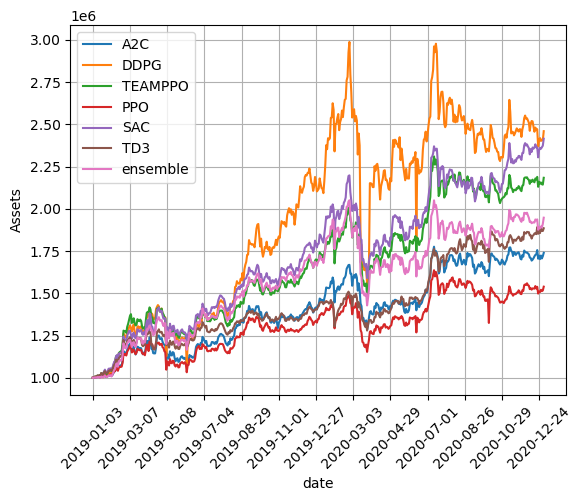

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


ticker_spacing = 40
fig,ax = plt.subplots(1,1)
ax.plot(x,y_A2C, label='A2C')
ax.plot(x,y_DDPG, label='DDPG')
ax.plot(x, y_teamPPO, label='TEAMPPO')
ax.plot(x,y_PPO, label='PPO')
ax.plot(x, y_SAC, label='SAC')
ax.plot(x, y_TD3, label='TD3')

ax.plot(x, y_ensemble, label= 'ensemble')

ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
# 下面的rotation表示的是旋转角度
plt.xticks(rotation = 45)
plt.xlabel('date')
plt.ylabel('Assets')
plt.grid()
plt.legend()
plt.show()
